In [1]:
!pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.3.tar.gz (169 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached importlib_me

In [1]:
from pycaret.regression import *


In [23]:
from pycaret.regression import RegressionExperiment
import pandas as pd
data = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\last_test.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])




In [24]:
data

,timestamp,humidity,pm_2_5,temperature
0,2021-08-18 00:00:00,82.810924,6.478261,27.261345
1,2021-08-18 01:00:00,84.977966,14.271186,26.650000
2,2021-08-18 02:00:00,84.600000,32.308333,26.710924
3,2021-08-18 03:00:00,85.113559,29.743590,26.647458
4,2021-08-18 04:00:00,85.430833,38.931034,26.551667
...,...,...,...,...
25531,2025-02-03 19:00:00,70.578723,28.591667,29.206171
25532,2025-02-03 20:00:00,69.189982,29.714286,28.579493
25533,2025-02-03 21:00:00,72.229974,22.954545,27.387404
25534,2025-02-03 22:00:00,74.487035,21.478992,26.806460


In [25]:
s = RegressionExperiment()
s.setup(data, target = 'pm_2_5', session_id = 123)



,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(25536, 4)"
4,Transformed data shape,"(25536, 6)"
5,Transformed train set shape,"(17875, 6)"
6,Transformed test set shape,"(7661, 6)"
7,Numeric features,2
8,Date features,1
9,Preprocess,True


In [26]:
best = s.compare_models()
best





,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.3184,59.0341,7.6787,0.7321,0.4026,0.4763,0.3460
rf,Random Forest Regressor,5.8837,66.4951,8.1466,0.6986,0.4375,0.5730,0.6610
lightgbm,Light Gradient Boosting Machine,7.0030,85.9565,9.2670,0.6102,0.5076,1.1074,0.2180
knn,K Neighbors Regressor,6.9609,89.5497,9.4587,0.5935,0.4962,0.6513,0.0220
dt,Decision Tree Regressor,7.5261,121.1773,10.9999,0.4502,0.5627,0.6170,0.0260
gbr,Gradient Boosting Regressor,8.4960,126.0100,11.2178,0.4292,0.5903,1.6840,0.2800
lar,Least Angle Regression,10.2102,173.1442,13.1500,0.2159,0.6965,3.1602,0.0130
br,Bayesian Ridge,10.2109,173.1445,13.1501,0.2159,0.6966,3.1608,0.0160
ridge,Ridge Regression,10.2102,173.1442,13.1500,0.2159,0.6965,3.1602,0.0180
lr,Linear Regression,10.2102,173.1442,13.1500,0.2159,0.6965,3.1602,0.6860


ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [1]:
test_results = s.predict_model(best)
print(test_results)

NameError: name 's' is not defined

In [28]:
s.evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
predictions = s.predict_model(best)# ทำนายแค่ test set
print("\nผลการทำนายในชุดทดสอบ:")
predictions[['prediction_label', 'pm_2_5']]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.2039,60.0537,7.7494,0.7385,0.3946,0.5079



ผลการทำนายในชุดทดสอบ:


,prediction_label,pm_2_5
24154,68.960192,49.308334
3134,39.799918,43.583332
1091,17.810753,9.471358
12019,15.386504,9.747899
18044,38.977251,31.094828
...,...,...
20723,9.371415,13.341666
12480,24.359607,16.067226
23506,14.162549,13.108334
10760,39.684230,43.825001


In [31]:
new_data = data.copy().drop(['pm_2_5'], axis=1)
# ทำนายค่า PM2.5 ในชุดทดสอบ
predictions = s.predict_model(best,data = new_data)
print("\nผลการทำนายในชุดทดสอบ:")
predictions[['prediction_label']]



ผลการทำนายในชุดทดสอบ:


,prediction_label
0,6.478261
1,14.271187
2,32.308334
3,29.743589
4,38.931034
...,...
25531,28.591667
25532,29.714285
25533,22.954546
25534,21.478992


In [11]:
data.iloc[27344]

timestamp      2025-02-04 00:00:00
humidity                 75.480921
pm_2_5                   14.941667
temperature              25.794946
pm_2_5_Lag1                 17.225
pm_2_5_Lag2              21.478992
pm_2_5_Lag3              22.954545
Name: 27344, dtype: object

In [12]:
predictions.iloc[27344]

timestamp           2025-02-04 00:00:00
humidity                      75.480919
temperature                   25.794947
pm_2_5_Lag1                      17.225
pm_2_5_Lag2                   21.478992
pm_2_5_Lag3                   22.954546
prediction_label               19.39475
Name: 27344, dtype: object

<Figure size 2000x600 with 0 Axes>

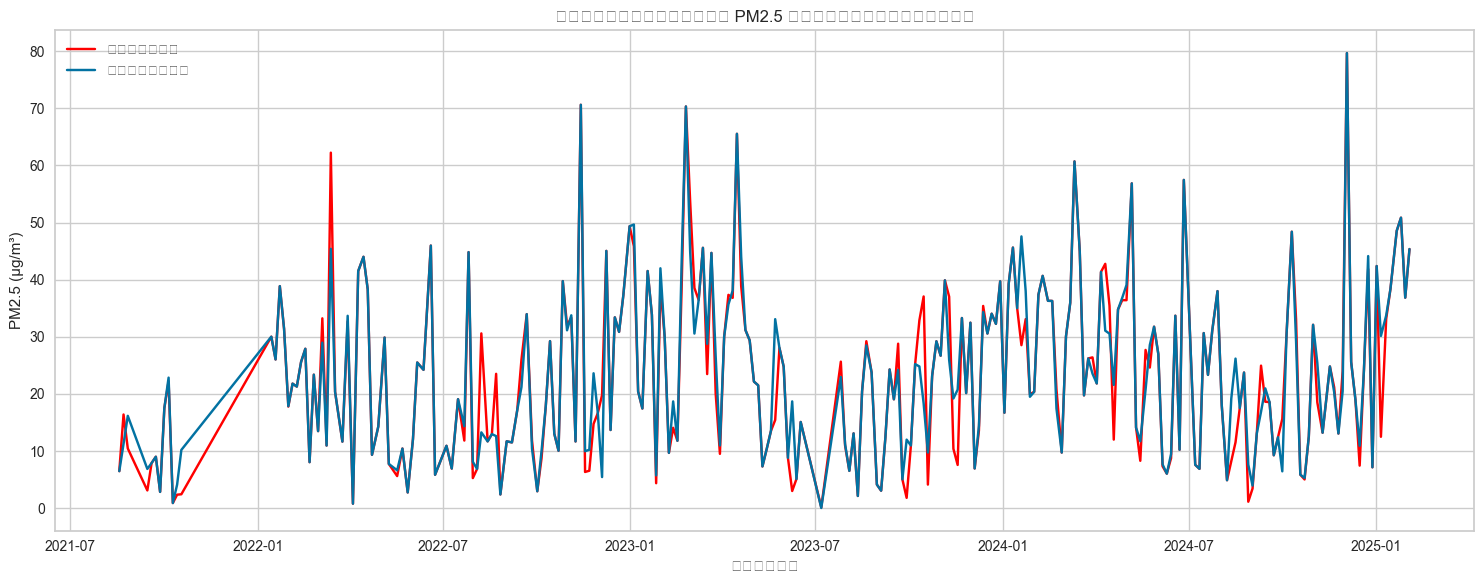

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sample_rate = 100  # แสดงทุกๆ 10 จุด


plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'][::100], data['pm_2_5'][::100], label='ค่าจริง', color = 'red')
plt.plot(data['timestamp'][::100], predictions['prediction_label'][::100], label='ค่าทำนาย', marker='x')
plt.title('เปรียบเทียบค่า PM2.5 จริงกับค่าทำนาย')
plt.xlabel('วันที่')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# data[::100]

In [33]:
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

file_path = r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\last_test.csv"
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Load the trained model
model = load_model(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\best_model')
np.random.seed(42)

def forecast_next_7_days(model, last_data, external_data):
    last_date = last_data['timestamp'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(7 * 24)]  # 7 days * 24 hours
    future_data = []
    current_data = last_data.copy()
    
    for future_hour in future_hours:
        new_row = {'timestamp': future_hour}
        
        # ใช้ค่า temperature และ humidity จาก external_data
        if future_hour in external_data['timestamp'].values:
            matched_row = external_data[external_data['timestamp'] == future_hour].iloc[0]
            new_row['temperature'] = matched_row['temperature']
            new_row['humidity'] = matched_row['humidity']
        else:
            new_row['temperature'] = current_data['temperature'].iloc[-1]  # ใช้ค่าล่าสุดที่มี
            new_row['humidity'] = current_data['humidity'].iloc[-1]
        
        # Create Lag Features for PM2.5
        # for lag in range(1, 4):
        #     if len(current_data) >= lag:
        #         new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].iloc[-lag]
        #     else:
        #         new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].mean()
        
        # Predict PM2.5 for this hour
        new_df = pd.DataFrame([new_row])
        prediction = predict_model(model, data=new_df)
        new_row['pm_2_5'] = prediction['prediction_label'].iloc[0]
        future_data.append(new_row)
        
        # Add predicted data to current_data for next hour prediction
        current_data = pd.concat([current_data, pd.DataFrame([new_row])], ignore_index=True)
    
    return pd.DataFrame(future_data)

# โหลด external data ที่มีค่า temperature และ humidity
external_file_path = r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours.csv"
external_data = pd.read_csv(external_file_path)
external_data['timestamp'] = pd.to_datetime(external_data['timestamp'])

# Generate forecast data
forecast_data = forecast_next_7_days(model, df, external_data)
forecast_data

Transformation Pipeline and Model Successfully Loaded


,timestamp,temperature,humidity,pm_2_5
0,2025-02-04 00:00:00,25.794946,75.480921,14.941667
1,2025-02-04 01:00:00,25.554351,75.151995,15.691667
2,2025-02-04 02:00:00,24.923516,77.632531,18.907562
3,2025-02-04 03:00:00,24.127439,81.569758,47.006393
4,2025-02-04 04:00:00,23.320383,86.182408,41.141666
...,...,...,...,...
163,2025-02-10 19:00:00,28.891425,69.219469,27.588236
164,2025-02-10 20:00:00,28.379455,70.651656,28.826037
165,2025-02-10 21:00:00,27.974364,71.649910,25.441668
166,2025-02-10 22:00:00,27.943536,71.973936,26.056074


<Figure size 2000x600 with 0 Axes>

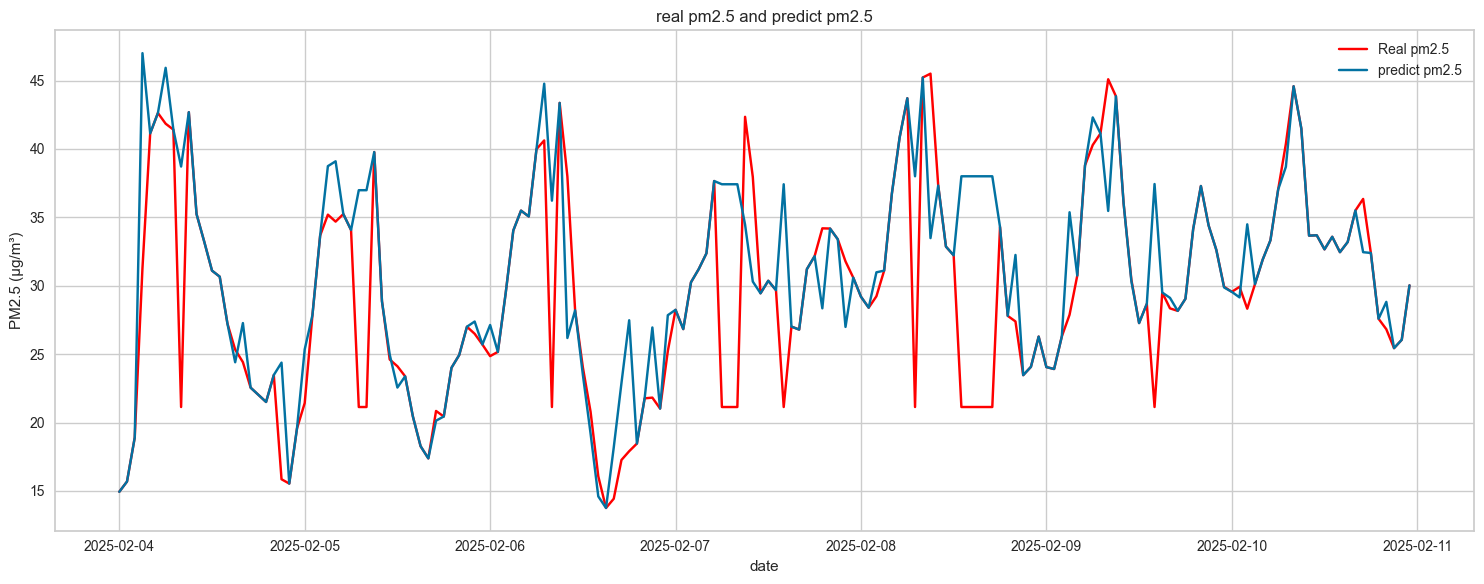

In [36]:
import matplotlib.pyplot as plt
data2 = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_hours.csv')
data2['timestamp'] = pd.to_datetime(data2['timestamp'])

plt.figure(figsize=(20, 6))
# sample_rate = 100  # แสดงทุกๆ 10 จุด
data2 = data2.iloc[-168:].copy()
data2 = data2.reset_index(drop=True)
plt.figure(figsize=(15, 6))
plt.plot(data2['timestamp'], data2['pm_2_5'], label='Real pm2.5', color = 'red')
plt.plot(forecast_data['timestamp'], forecast_data['pm_2_5'], label='predict pm2.5', marker='x')
plt.title('real pm2.5 and predict pm2.5')
plt.xlabel('date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
merged_data = forecast_data.merge(external_data[['timestamp', 'pm_2_5']], on='timestamp', suffixes=('_predicted', '_actual'))
mae = mean_absolute_error(merged_data['pm_2_5_actual'], merged_data['pm_2_5_predicted'])
mse = mean_squared_error(merged_data['pm_2_5_actual'], merged_data['pm_2_5_predicted'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((merged_data['pm_2_5_actual'] - merged_data['pm_2_5_predicted']) / merged_data['pm_2_5_actual'])) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 2.514597271307724
MSE: 31.960372397861917
RMSE: 5.653350546168344
MAPE: 10.672975544759385%


In [15]:
!pip install numpy

In [46]:

import pandas as pd
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np

file_path = r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_vtest_hours.csv"
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Load the trained model
model = load_model(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\best_model')
np.random.seed(42)

def forecast_next_7_days(model, last_data):
    last_date = last_data['timestamp'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(30 * 24)]  # 7 days * 24 hours
    
    future_data = []
    current_data = last_data.copy()
    
    for future_hour in future_hours:
        new_row = {'timestamp': future_hour}
        
        # Calculate mean temperature and humidity from recent data
        temp_mean = current_data['temperature'].tail(24).mean()
        humidity_mean = current_data['humidity'].tail(24).mean()
        
        # Generate temperature and humidity using normal distribution
        new_row['temperature'] = np.random.normal(temp_mean, 2)
        new_row['humidity'] = np.clip(np.random.normal(humidity_mean, 5), 0, 100)
        
        # Create Lag Features for PM2.5
        for lag in range(1, 8):
            if len(current_data) >= lag:
                new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].iloc[-lag]
            else:
                new_row[f'pm_2_5_Lag{lag}'] = current_data['pm_2_5'].mean()
        
        # Predict PM2.5 for this hour
        new_df = pd.DataFrame([new_row])
        prediction = predict_model(model, data=new_df)
        
        new_row['pm_2_5'] = prediction['prediction_label'].iloc[0]
        future_data.append(new_row)
        
        # Add predicted data to current_data for next hour prediction
        current_data = pd.concat([current_data, pd.DataFrame([new_row])], ignore_index=True)
    
    return pd.DataFrame(future_data)

# Generate forecast data
forecast_data = forecast_next_7_days(model, df)


Transformation Pipeline and Model Successfully Loaded



ผลการพยากรณ์ค่า PM2.5 ล่วงหน้า 7 วัน:
    วันที่  ค่า PM2.5 (µg/m³)  อุณหภูมิ (°C)  ความชื้น (%)
2025-02-11          32.629879      27.204791     80.992146
2025-02-11          31.897104      28.525279     76.559161
2025-02-11          32.610795      28.090074     75.815179
2025-02-11          33.335674      26.874376     92.343641
2025-02-11          34.723466      26.303951     75.695699
2025-02-11          36.213681      22.045270     81.896227
2025-02-11          37.663407      25.453982     76.666990
2025-02-11          38.990576      25.359180     76.587859
2025-02-11          40.387915      25.720922     77.313407
2025-02-11          41.667022      26.089920     76.993568
2025-02-11          43.173419      25.782535     84.516339
2025-02-11          44.095843      27.800682     82.879728
2025-02-12          45.936197      24.610703     85.011904
2025-02-12          43.117337      28.278630     76.218169
2025-02-12          41.454558      29.205923     75.272121
2025-02-12       

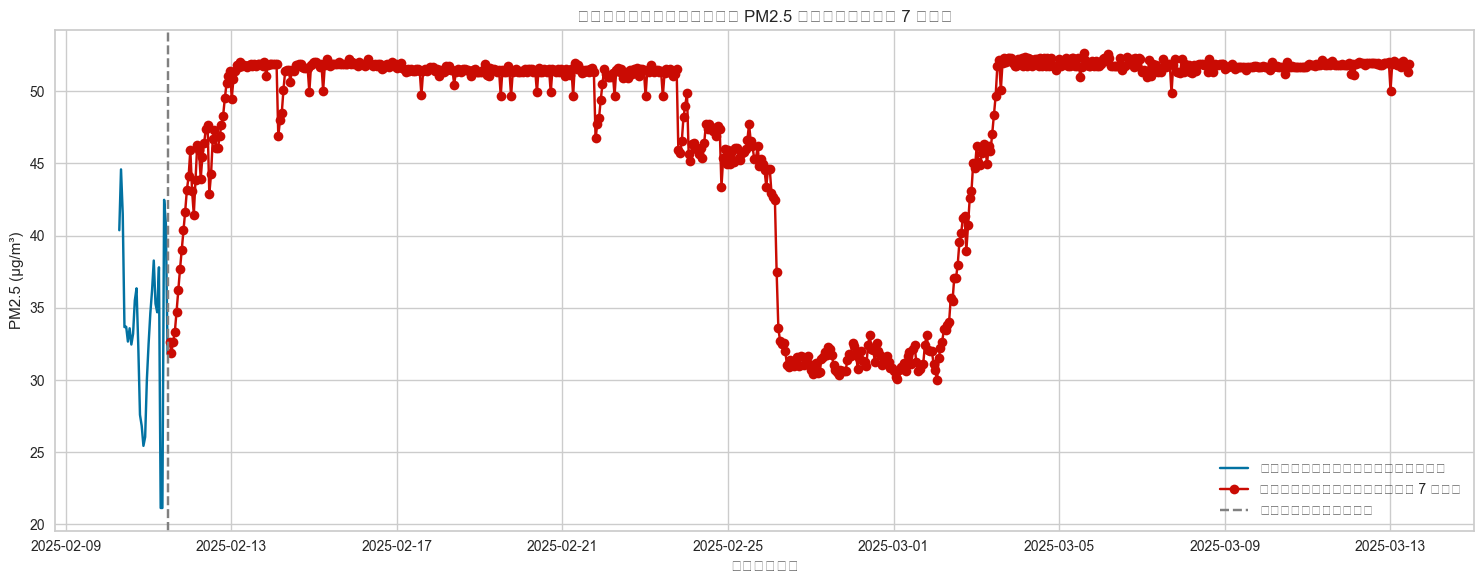

In [45]:


# แสดงผลการพยากรณ์
print("\nผลการพยากรณ์ค่า PM2.5 ล่วงหน้า 7 วัน:")
forecast_display = forecast_data[['timestamp', 'pm_2_5', 'temperature', 'humidity']].copy()
forecast_display['timestamp'] = forecast_display['timestamp'].dt.strftime('%Y-%m-%d')
forecast_display = forecast_display.rename(columns={
    'timestamp': 'วันที่', 
    'pm_2_5': 'ค่า PM2.5 (µg/m³)', 
    'temperature': 'อุณหภูมิ (°C)',
    'humidity': 'ความชื้น (%)'
})
print(forecast_display.to_string(index=False))

# สร้างกราฟแสดงผลการพยากรณ์ล่วงหน้า
plt.figure(figsize=(15, 6))
# แสดงข้อมูลจริง 30 วันล่าสุด
plt.plot(data['timestamp'].tail(30), data['pm_2_5'].tail(30), 'b-', label='ข้อมูลจริงย้อนหลัง')
# แสดงข้อมูลที่พยากรณ์ล่วงหน้า 7 วัน
plt.plot(forecast_data['timestamp'], forecast_data['pm_2_5'], 'r-o', label='พยากรณ์ล่วงหน้า 7 วัน')
plt.axvline(x=data['timestamp'].max(), color='gray', linestyle='--', label='วันปัจจุบัน')
plt.title('การพยากรณ์ค่า PM2.5 ล่วงหน้า 7 วัน')
plt.xlabel('วันที่')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
print(forecast_data.dtypes)
print(data.dtypes)

timestamp      datetime64[ns]
temperature           float64
humidity              float64
pm_2_5_Lag1           float64
pm_2_5_Lag2           float64
pm_2_5_Lag3           float64
pm_2_5_Lag4           float64
pm_2_5_Lag5           float64
pm_2_5_Lag6           float64
pm_2_5_Lag7           float64
pm_2_5                float64
dtype: object
timestamp       object
humidity       float64
pm_2_5         float64
temperature    float64
pm_2_5_Lag1    float64
pm_2_5_Lag2    float64
pm_2_5_Lag3    float64
pm_2_5_Lag4    float64
pm_2_5_Lag5    float64
pm_2_5_Lag6    float64
pm_2_5_Lag7    float64
dtype: object


In [11]:

train_predictions = s.predict_model(best, data=s.get_config('X_train'))
train_predictions


,timestamp,humidity,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5_Lag4,pm_2_5_Lag5,pm_2_5_Lag6,pm_2_5_Lag7,prediction_label
14180,2023-07-27 11:00:00,79.035118,30.451906,13.333333,15.478992,29.983334,34.566666,29.441441,28.109243,24.775000,14.211568
19585,2024-03-09 01:00:00,73.278458,28.342733,25.850000,26.366667,30.890757,31.808332,31.094828,28.638655,25.116667,25.578993
13091,2023-05-14 00:00:00,100.000000,30.810083,15.566667,12.416667,13.420168,24.008333,31.291666,13.390625,23.666666,16.239844
15257,2023-09-10 10:00:00,78.078148,28.511415,11.208333,18.566668,16.109243,14.008333,14.025000,17.784313,14.750000,12.281679
20278,2024-04-06 23:00:00,69.874939,30.453722,33.909092,35.730434,33.680672,32.108334,29.299999,25.616667,25.638655,32.898123
...,...,...,...,...,...,...,...,...,...,...,...
15377,2023-09-15 10:00:00,81.154900,28.304350,25.235294,28.290598,35.875000,34.356522,38.324074,34.400002,33.250000,25.020727
21602,2024-06-01 10:00:00,72.141327,29.982399,21.128204,26.985714,24.116667,27.638655,6.643478,9.450000,9.058824,21.290738
17730,2023-12-22 11:00:00,67.076378,30.717722,11.150000,10.858334,14.294118,13.575000,12.333333,10.958333,16.537815,12.228702
15725,2023-09-29 22:00:00,77.071220,29.018904,38.958332,32.658333,32.092438,27.716667,30.700001,39.991302,41.583332,37.483757


In [ ]:
# new_data = data.copy().drop(['pm_2_5'], axis=1)
# predictions = s.predict_model(tune_model, data=new_data)
# predictions
# predictions.to_csv(r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\test1hv-1.csv", index=False)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,4.1211,27.8621,5.2785,-1.2610,0.1316,0.1003


,timestamp,humidity,temperature,pm_2_5_Lag1,pm_2_5_Lag2,pm_2_5_Lag3,pm_2_5_Lag4,pm_2_5_Lag5,pm_2_5_Lag6,pm_2_5_Lag7,pm_2_5,prediction_label
11987,2023-03-29 00:00:00,100.0,28.862223,32.386555,33.075001,29.850000,26.216667,19.758333,19.033058,19.949579,41.959595,32.173726
11988,2023-03-29 01:00:00,100.0,28.247000,41.959595,32.386555,33.075001,29.850000,26.216667,19.758333,19.033058,42.900002,40.795550
11989,2023-03-29 02:00:00,100.0,28.085667,42.900002,41.959595,32.386555,33.075001,29.850000,26.216667,19.758333,47.033333,41.642515
11990,2023-03-29 03:00:00,100.0,28.019411,47.033333,42.900002,41.959595,32.386555,33.075001,29.850000,26.216667,37.901962,45.365141
11991,2023-03-29 04:00:00,100.0,27.397833,37.901962,47.033333,42.900002,41.959595,32.386555,33.075001,29.850000,36.174999,37.141101
11992,2023-03-29 05:00:00,100.0,27.281834,36.174999,37.901962,47.033333,42.900002,41.959595,32.386555,33.075001,38.608334,35.585736
11993,2023-03-29 06:00:00,100.0,27.344250,38.608334,36.174999,37.901962,47.033333,42.900002,41.959595,32.386555,37.891666,37.777284


In [ ]:
exp1.save_model(best, 'models/best_model')

,Unnamed: 0,timestamp,timezone,humidity,pm_2_5_sp,temperature,prediction_label
0,0,8/15/2021 7:00,Asia/Bangkok,82.633751,NaN,28.392101,21.897203
1,1,8/16/2021 7:00,Asia/Bangkok,87.845352,NaN,26.644278,19.928666
2,2,8/17/2021 7:00,Asia/Bangkok,90.980721,NaN,26.299335,18.834054
3,3,8/18/2021 7:00,Asia/Bangkok,77.261292,NaN,28.296894,19.332288
4,4,8/19/2021 7:00,Asia/Bangkok,78.807030,NaN,27.969023,18.036331


In [22]:
s.save_model(best, r'C:\Users\ASUS\Desktop\projectforecastpm2_5\models\best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'C:\\Users\\ASUS\\Desktop\\projectforecastpm2_5\\models\\best_model.pkl')

In [ ]:
from pycaret.regression import *
import pandas as pd

# โหลดข้อมูล
data = pd.read_csv(r'C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\cleandata_vtest_day.csv')

# ตั้งค่า PyCaret environment
reg_setup = setup(data, target='pm_2_5', session_id=123, 
                  normalize=True, transformation=True, 
                  ignore_features=['unnecessary_column'], 
                  remove_multicollinearity=True, 
                  multicollinearity_threshold=0.9)

# เปรียบเทียบโมเดล
best_model = compare_models()

# สร้างโมเดลที่ดีที่สุด
omp_model = create_model('omp')

# ปรับแต่งโมเดล
tuned_omp_model = tune_model(omp_model)

# ประเมินโมเดล
evaluate_model(tuned_omp_model)

# ทำนายผลลัพธ์
predictions = predict_model(tuned_omp_model)

# บันทึกโมเดล
save_model(tuned_omp_model, 'best_omp_model')

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(1159, 11)"
4,Transformed data shape,"(1159, 11)"
5,Transformed train set shape,"(811, 11)"
6,Transformed test set shape,"(348, 11)"
7,Ignore features,1
8,Numeric features,9
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,6.6943,71.7958,8.4522,0.3249,0.3905,0.3894,0.0240
en,Elastic Net,7.2822,78.0168,8.8081,0.2684,0.4183,0.4447,0.0200
et,Extra Trees Regressor,8.5070,107.3068,10.3349,-0.0071,0.4756,0.5101,0.0540
rf,Random Forest Regressor,8.5053,107.3751,10.3382,-0.0078,0.4756,0.5096,0.0750
dt,Decision Tree Regressor,8.5122,107.4137,10.3411,-0.0086,0.4758,0.5104,0.0160
gbr,Gradient Boosting Regressor,8.5175,107.5244,10.3457,-0.0093,0.4762,0.5112,0.0410
dummy,Dummy Regressor,8.5174,107.5736,10.3480,-0.0097,0.4762,0.5110,0.0150
lightgbm,Light Gradient Boosting Machine,8.5196,107.5821,10.3485,-0.0098,0.4763,0.5114,0.1020
ada,AdaBoost Regressor,8.4816,107.6253,10.3501,-0.0101,0.4738,0.5027,0.0280
huber,Huber Regressor,8.7182,108.8864,10.4143,-0.0235,0.4872,0.5424,0.0160


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1711,124.6582,11.1650,-0.0371,0.5243,0.6002
1,9.2975,117.0662,10.8197,-0.0566,0.5605,0.7049
2,8.7399,108.4692,10.4149,-0.0044,0.4501,0.4767
3,8.5059,101.4471,10.0721,-0.0004,0.4564,0.4864
4,8.0589,91.1764,9.5486,-0.0446,0.4544,0.5009
5,8.2821,92.5018,9.6178,-0.0469,0.4449,0.4920
6,9.5048,132.1716,11.4966,-0.0000,0.5188,0.5726
7,7.7737,93.8439,9.6873,-0.0338,0.4597,0.4941
8,9.5979,119.8695,10.9485,-0.0003,0.4964,0.5548


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1711,124.6582,11.1650,-0.0371,0.5243,0.6002
1,9.2975,117.0662,10.8197,-0.0566,0.5605,0.7049
2,8.7399,108.4692,10.4149,-0.0044,0.4501,0.4767
3,8.5059,101.4471,10.0721,-0.0004,0.4564,0.4864
4,8.0589,91.1764,9.5486,-0.0446,0.4544,0.5009
5,8.2821,92.5018,9.6178,-0.0469,0.4449,0.4920
6,9.5048,132.1716,11.4966,-0.0000,0.5188,0.5726
7,7.7737,93.8439,9.6873,-0.0338,0.4597,0.4941
8,9.5979,119.8695,10.9485,-0.0003,0.4964,0.5548


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,8.1884,98.1965,9.9094,-0.0320,0.4593,0.5004


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature',
                                              'pm_2_5_Lag1', 'pm_2_5_Lag2',
                                              'pm_2_5_Lag3', 'pm_2_5_Lag4',
                                              'pm_2_5_Lag5', 'pm_2_5_Lag6',
                                              'pm_2_5_Lag7'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=SimpleImputer(strategy='mo...
                                     transformer=TargetEncoder(cols=['timestamp'],
                                                               handle_missing='return_nan'))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     